In [9]:
from skimage.transform import warp
from skimage.transform import AffineTransform
from matplotlib import pyplot as plt
import numpy as np

(480, 720, 4)

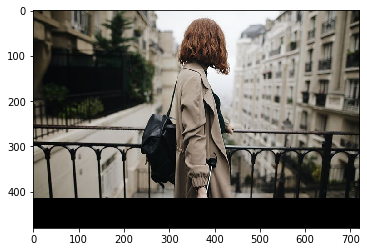

In [58]:
file=r'..\data\2.jpg'
im=plt.imread(file)
image=im[...,:3]
plt.imshow(im)
im.shape

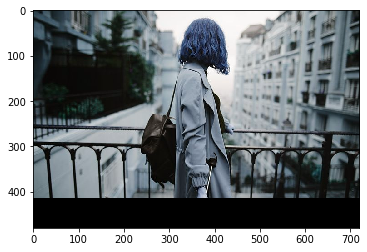

In [57]:
import cv2
plt.imshow(cv2.imread(file, cv2.IMREAD_COLOR))

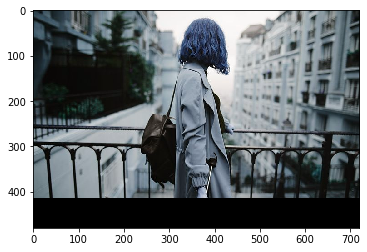

In [59]:
plt.imshow(cv2.imread(file))

## AffineTransform

    """2D affine transformation of the form:

        X = a0*x + a1*y + a2 =
          = sx*x*cos(rotation) - sy*y*sin(rotation + shear) + a2

        Y = b0*x + b1*y + b2 =
          = sx*x*sin(rotation) + sy*y*cos(rotation + shear) + b2

    where ``sx`` and ``sy`` are scale factors in the x and y directions,
    and the homogeneous transformation matrix is::

        [[a0  a1  a2]
         [b0  b1  b2]
         [0   0    1]]

    Parameters
    ----------
    matrix : (3, 3) array, optional
        Homogeneous transformation matrix.
    scale : (sx, sy) as array, list or tuple, optional
        Scale factors.
    rotation : float, optional
        Rotation angle in counter-clockwise direction as radians.
    shear : float, optional
        Shear angle in counter-clockwise direction as radians.
    translation : (tx, ty) as array, list or tuple, optional
        Translation parameters.

    Attributes
    ----------
    params : (3, 3) array
        Homogeneous transformation matrix.

    """

In [5]:
def combine(*affines):
    t0 = affines[0].params
    for ti in affines[1:]:
        t0 = t0.dot(ti.params)
    return AffineTransform(t0)

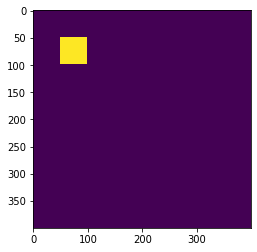

In [95]:
x = np.zeros([400,400])
x[50:100,50:100]=100
#x[150:180,200:250]=200
plt.imshow(x)

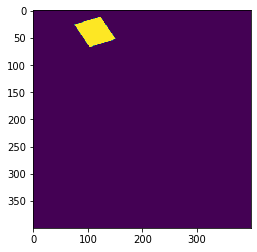

In [99]:
t1 = AffineTransform(translation=(-200, -200)) # move img_obj to origin
t2 = AffineTransform(
    scale=(1, 1), rotation=-0.3, shear=-0.3)
t3 = AffineTransform(translation=(200, 200))
t= combine(t1,t2,t3)
y=warp(x.astype(np.uint8), t2.inverse, output_shape=x.shape)
plt.imshow(y)

In [105]:
np.unique((y*255).astype(np.uint8)),np.unique(x)

(array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  31,  32,  33,  35,  36,  37,  38,  40,  41,  42,  43,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,
         60,  61,  62,  64,  65,  66,  67,  69,  70,  71,  73,  74,  76,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
         92,  93,  95,  96,  97,  98,  99, 100], dtype=uint8),
 array([  0., 100.]))

In [107]:
np.unique((y*255).astype(np.uint8),return_counts=True)

(array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  31,  32,  33,  35,  36,  37,  38,  40,  41,  42,  43,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,
         60,  61,  62,  64,  65,  66,  67,  69,  70,  71,  73,  74,  76,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
         92,  93,  95,  96,  97,  98,  99, 100], dtype=uint8),
 array([157516,      5,      2,      1,      3,      2,      2,      1,
             2,      3,      3,      2,      4,      2,      1,      1,
             1,      3,      2,      2,      1,      3,      3,      1,
             2,      4,      3,      2,      2,      4,      1,      1,
             2,      5,      2,      1,      5,      1,      2,      2,
             3,      1,      1,      3,      3,      2,      1,      1,
             4,      2,      2,      2,      4,      1,      2,    

In [56]:
rows,cols=np.where(y==200)
np.min(rows),np.max(rows),np.min(cols),np.max(cols)

(51, 88, 276, 338)

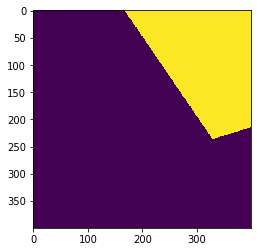

In [49]:
plt.imshow(warp(x, t.inverse, output_shape=x.shape))

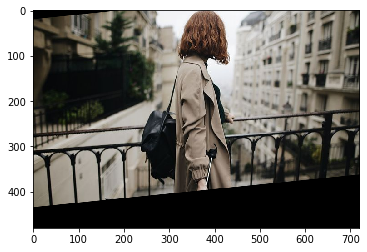

In [14]:
matrix = np.array([[1, 0, 0], [0.1, 1, -20], [0, 0, 1]])
warped = warp(image, matrix)
from skimage.transform import ProjectiveTransform
warped = warp(image, ProjectiveTransform(matrix=matrix))
plt.imshow(warped)

In [82]:
x=np.zeros(shape=(2,2))
y=np.array([[True,False],[True,False]])
x,y

(array([[0., 0.],
        [0., 0.]]), array([[ True, False],
        [ True, False]]))

In [94]:
x[y]=(y*3)[y]
x

array([[3., 0.],
       [3., 0.]])

In [92]:
y*3

array([[3, 0],
       [3, 0]])

In [80]:
a*1

array([1, 1])